In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt

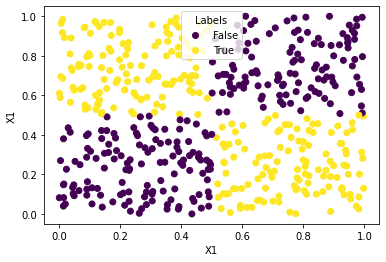

In [7]:
#Simulate two features and ground truth labels.
X = np.random.rand(500,2)
y = np.zeros((500,1))
y = ((X[:,0]<0.5)*(X[:,1]>=0.5)*1) + ((X[:,0]>=0.5)*(X[:,1]<0.5)*1)

scatter = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X1")
plt.ylabel("X1")
plt.legend(handles=scatter.legend_elements()[0],title="Labels",labels=['False','True'])
plt.show()

Here is where we are going to fit our simple neural network, to try to accurately predict the outcome label.

Questions: 

* What is the topology of the initial network? Describe it. 
* Can we do better by adding another 'linear' layer?   
* Can we do better by adding more nodes to our 'linear' layer? 
* Can we do better by changing the activation function?   


Epoch 1/1000
20/20 [==============================] - 1s 20ms/step - loss: 0.6917 - mse: 0.2493 - mae: 0.4992 - val_loss: 0.6913 - val_mse: 0.2491 - val_mae: 0.4991
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6895 - mse: 0.2482 - mae: 0.4981 - val_loss: 0.6899 - val_mse: 0.2484 - val_mae: 0.4983
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6877 - mse: 0.2473 - mae: 0.4972 - val_loss: 0.6884 - val_mse: 0.2476 - val_mae: 0.4976
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6856 - mse: 0.2462 - mae: 0.4961 - val_loss: 0.6865 - val_mse: 0.2467 - val_mae: 0.4966
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.6833 - mse: 0.2451 - mae: 0.4950 - val_loss: 0.6844 - val_mse: 0.2457 - val_mae: 0.4956
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.6811 - mse: 0.2440 - mae: 0.4939 - val_loss: 0.6827 - val_mse: 0.2448 - val_mae: 0.4947
Epoch 7/1000
20

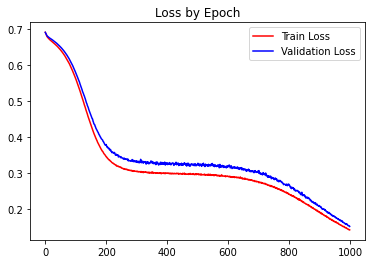

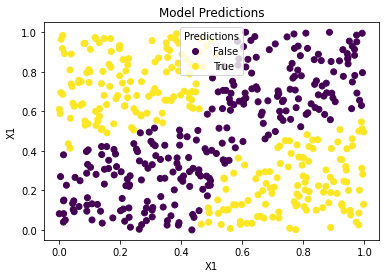

In [18]:
model = keras.Sequential([
      layers.Dense(units=100,activation='relu'),
      layers.Dense(units=10,activation='relu'),
      layers.Dense(units=1,activation='sigmoid')
])  

model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=['mse','mae'])

history = model.fit(X,y,epochs=1000,batch_size=20,validation_split=0.2)

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.legend(['Train Loss','Validation Loss'])
plt.title("Loss by Epoch")
plt.show()

predictions = model(X)
scatter = plt.scatter(X[:,0],X[:,1],c=(predictions.numpy()>0.5))
plt.xlabel("X1")
plt.ylabel("X1")
plt.legend(handles=scatter.legend_elements()[0],title="Predictions",labels=['False','True'])
plt.title("Model Predictions")
plt.show()

Set these things aside for now we will come back to them later.

In [19]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               300       
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X = np.divide(X,np.max(X))
# X = np.concatenate((X,(X[:,0]*X[:,1]).reshape(500,1)),axis=1)

In [20]:
x=tf.Variable(15.0)
with tf.GradientTape() as tape:
  y=x+x*x
print(tape.gradient(y,x).numpy())

31.0
